Import the necessary libraries.

In [1]:
import csv
import sys
from transformers import BertModel, BertConfig, BertTokenizer
import os
from create_input_lists import lemmatize
import matplotlib.pyplot as plt

Create the BERT tokenizer.

In [2]:
model_path = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_path)

Read the text data from file and process it.

In [3]:
csv.field_size_limit(sys.maxsize)

filepaths = ['./Clusters/1_assessmentClusters_skill_5_second_tfidf_5_assessment.csv',
            './Clusters/1_assessmentClusters_skill_39_second_tfidf_50_assessment.csv',
            './Clusters/1_assessmentClusters_skill_73_second_tfidf_100_assessment.csv',
            './Clusters/1_assessmentClusters_skill_110_second_tfidf_150_assessment.csv']

clusterTexts = []
for filepath in filepaths:
    with open(filepath, 'r') as csvfile:
        csv_reader = csv.reader(csvfile)
        for row in csv_reader:
            clusterTexts.append(row[2])
            
clusteredLemmatizedTexts = []
for cluster in clusterTexts:
    clusteredLemmatizedTexts.append(lemmatize(cluster))

Tokenize the lemmatized texts (assessments and paragraphs).

In [4]:
cluster_lengths = []
for cluster in clusteredLemmatizedTexts:
    tokens = tokenizer(cluster)
    cluster_lengths.append(len(tokens['input_ids']))

Token indices sequence length is longer than the specified maximum sequence length for this model (4172 > 512). Running this sequence through the model will result in indexing errors


Output and graph the statistics for the lengths of the assessments and paragraphs.

In [5]:
min_cluster_length = min(cluster_lengths)
max_cluster_length = max(cluster_lengths)
mean_cluster_length = 0 if len(cluster_lengths) == 0 else sum(cluster_lengths)/len(cluster_lengths)

print('Minimum Length of a Cluster:', min_cluster_length)
print('Maximum Length of a Cluster:', max_cluster_length)
print(f'Mean Length of a Cluster: {(mean_cluster_length):.2f}\n')

Minimum Length of a Cluster: 15
Maximum Length of a Cluster: 17202
Mean Length of a Cluster: 403.37



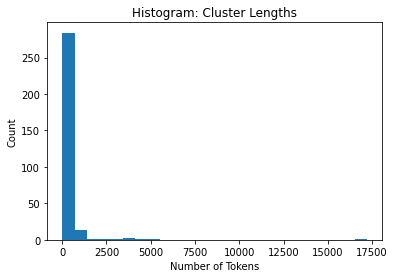

In [11]:
plt.hist(cluster_lengths, bins = 25)
plt.title('Histogram: Cluster Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Count')
plt.show()

In [13]:
percentage = 256 / mean_cluster_length
print(f'Percentage of Average Cluster Being Used: {(percentage):.4f}\n')

Percentage of Average Cluster Being Used: 0.6347



In [15]:
counter = 0
for cluster in clusteredLemmatizedTexts:
    tokens = tokenizer(cluster)
    if len(tokens['input_ids']) > 4096:
        counter += 1
percentage = counter / 4096
print(f'Percentage of Clusters Larger than 4096 tokens: {(percentage):.4f}\n')

Percentage of Clusters Larger than 4096 tokens: 0.0007

